In [46]:
import serial
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft
import math

start=0
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

data = pd.read_csv("./20220117走路data/手25sec1470cm41step.csv")
data = np.array(data)
length=[]
for i in range(len(data)):
    length.append(i)
# print(len(length))
Spectrum=[]
Spectrum_index=list(range(0, 100))
index=0

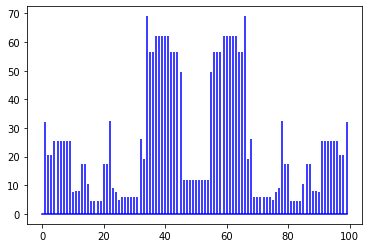

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


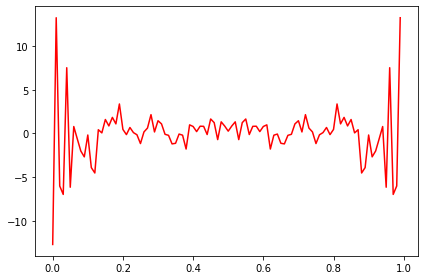

ValueError: invalid number of data points (0) specified

In [47]:
for i in range (0,2000,1000):
#     x=np.real(fft(data[start+(sr*i):start+((i+1)*sr),1]))
    x=np.real(fft(data[start+i:start+i+sr,1]))
    X = fft(x)
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T 

#     plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
#     plt.xticks(fontsize = 30)
#     plt.yticks(fontsize = 30)
    plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
    Spectrum.append(np.abs(X))
#     plt.xlabel('Freq (Hz)', fontsize = 40, labelpad = 20)
#     plt.ylabel('FFT Amplitude |X(freq)|', fontsize = 40, labelpad = 20)
    plt.show()
#     plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
#     plt.xticks(fontsize = 30)
#     plt.yticks(fontsize = 30)
    plt.plot(t, ifft(X), 'r')
#     plt.xlabel('Time (s)', fontsize = 40, labelpad = 20)
#     plt.ylabel('Amplitude', fontsize = 40, labelpad = 20)
    plt.tight_layout()
    plt.show()

In [48]:
print(Spectrum)

[array([1.33226763e-14, 3.20000000e+01, 2.05000000e+01, 2.05000000e+01,
       2.55000000e+01, 2.55000000e+01, 2.55000000e+01, 2.55000000e+01,
       2.55000000e+01, 2.55000000e+01, 7.50000000e+00, 8.00000000e+00,
       8.00000000e+00, 1.75000000e+01, 1.75000000e+01, 1.05000000e+01,
       4.50000000e+00, 4.50000000e+00, 4.50000000e+00, 4.50000000e+00,
       1.75000000e+01, 1.75000000e+01, 3.25000000e+01, 9.00000000e+00,
       7.50000000e+00, 5.00000000e+00, 6.00000000e+00, 6.00000000e+00,
       6.00000000e+00, 6.00000000e+00, 6.00000000e+00, 6.00000000e+00,
       2.60000000e+01, 1.90000000e+01, 6.90000000e+01, 5.65000000e+01,
       5.65000000e+01, 6.20000000e+01, 6.20000000e+01, 6.20000000e+01,
       6.20000000e+01, 6.20000000e+01, 5.65000000e+01, 5.65000000e+01,
       5.65000000e+01, 4.95000000e+01, 1.20000000e+01, 1.20000000e+01,
       1.20000000e+01, 1.20000000e+01, 1.20000000e+01, 1.20000000e+01,
       1.20000000e+01, 1.20000000e+01, 1.20000000e+01, 4.95000000e+01,
     

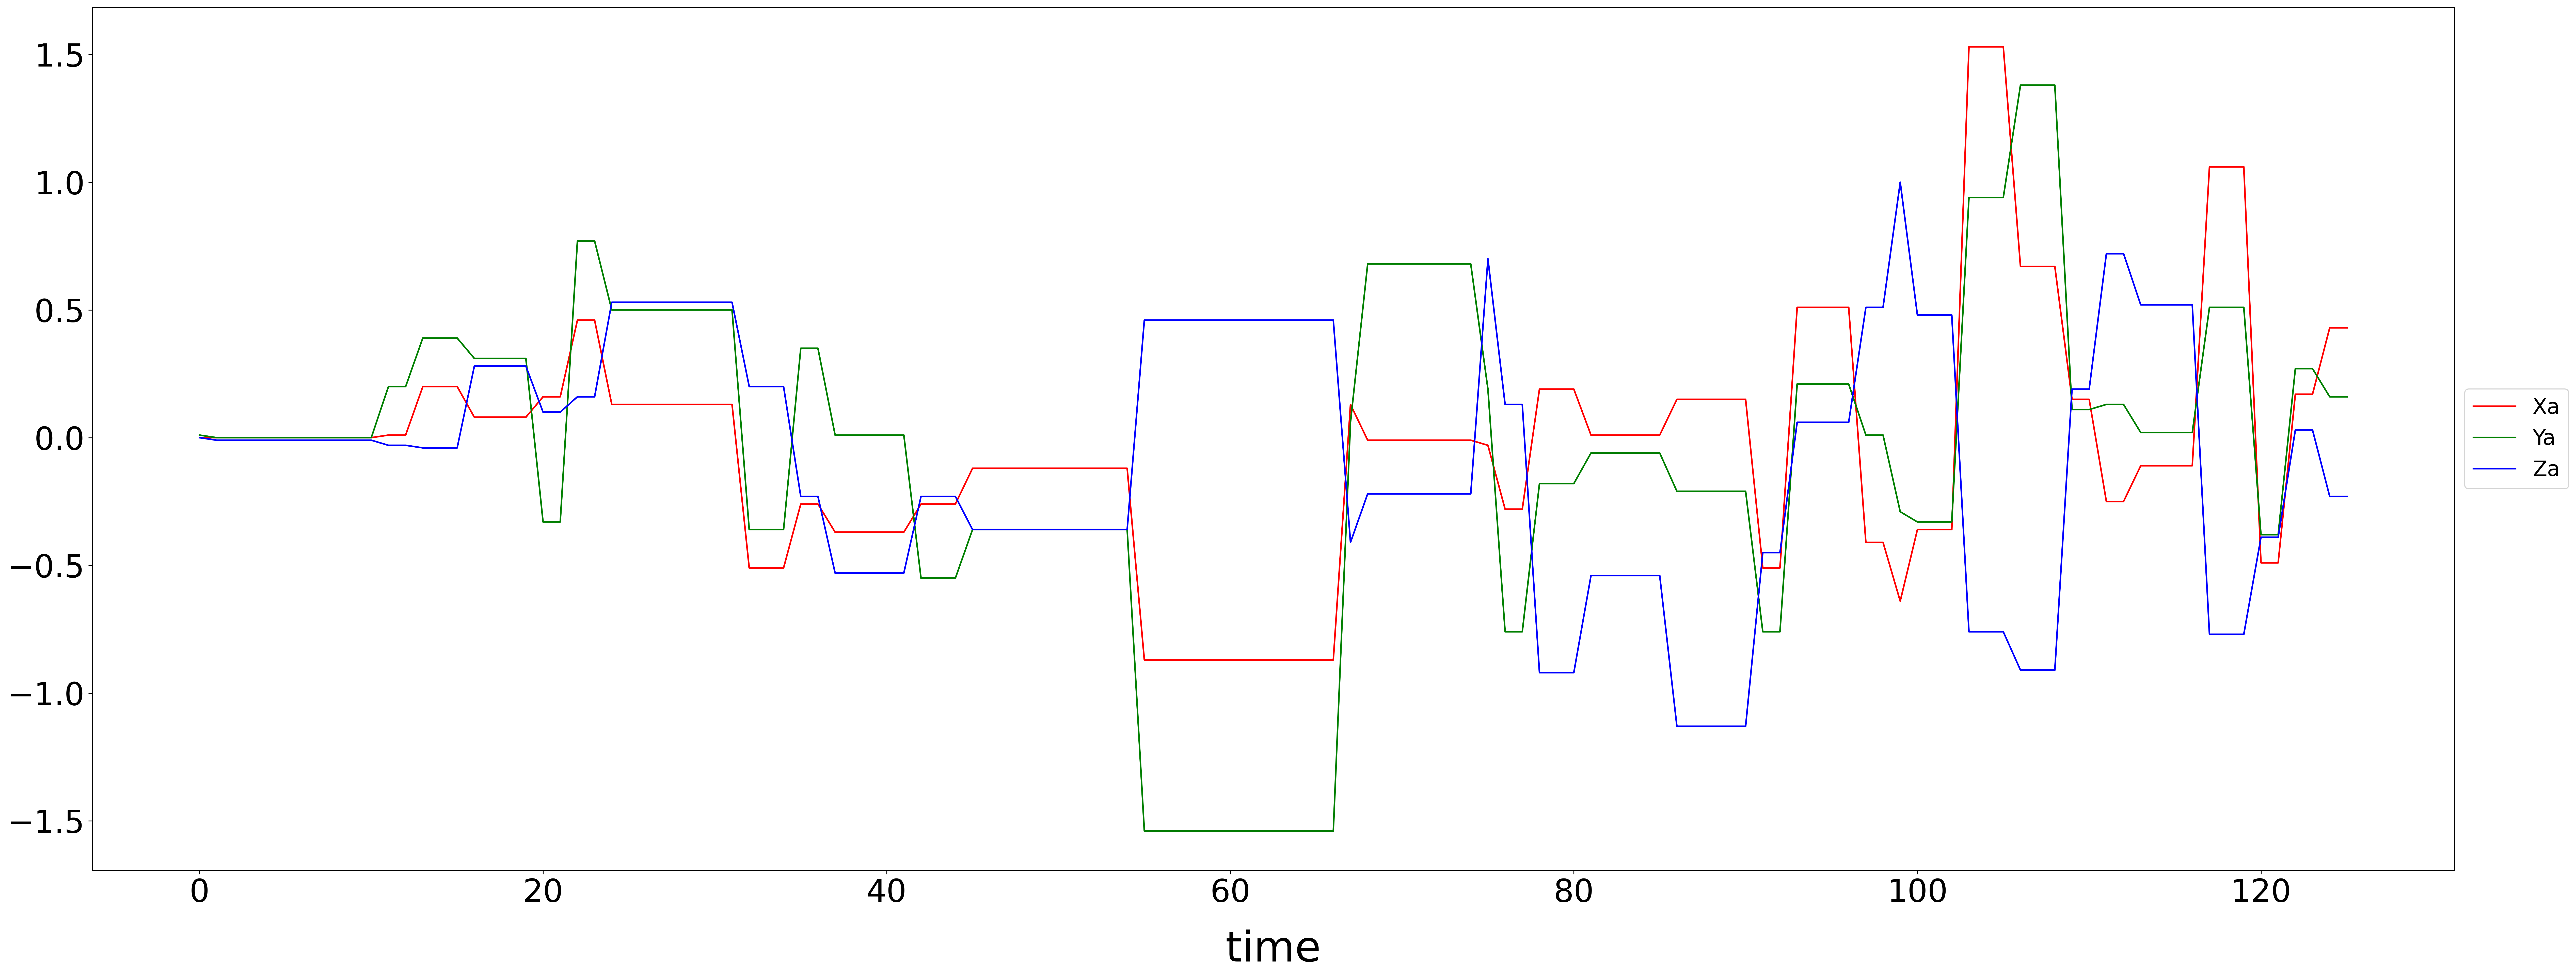

In [49]:
# show all data
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(length, data[:,1], color = 'r', label = "Xa")
plt.plot(length, data[:,2], color = 'g', label = "Ya")
plt.plot(length, data[:,3], color = 'b', label = "Za")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()

<ipython-input-50-462cf41a0458>:14: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=126).
  plt.specgram(data[:,1],Fs=1,cmap='plasma')


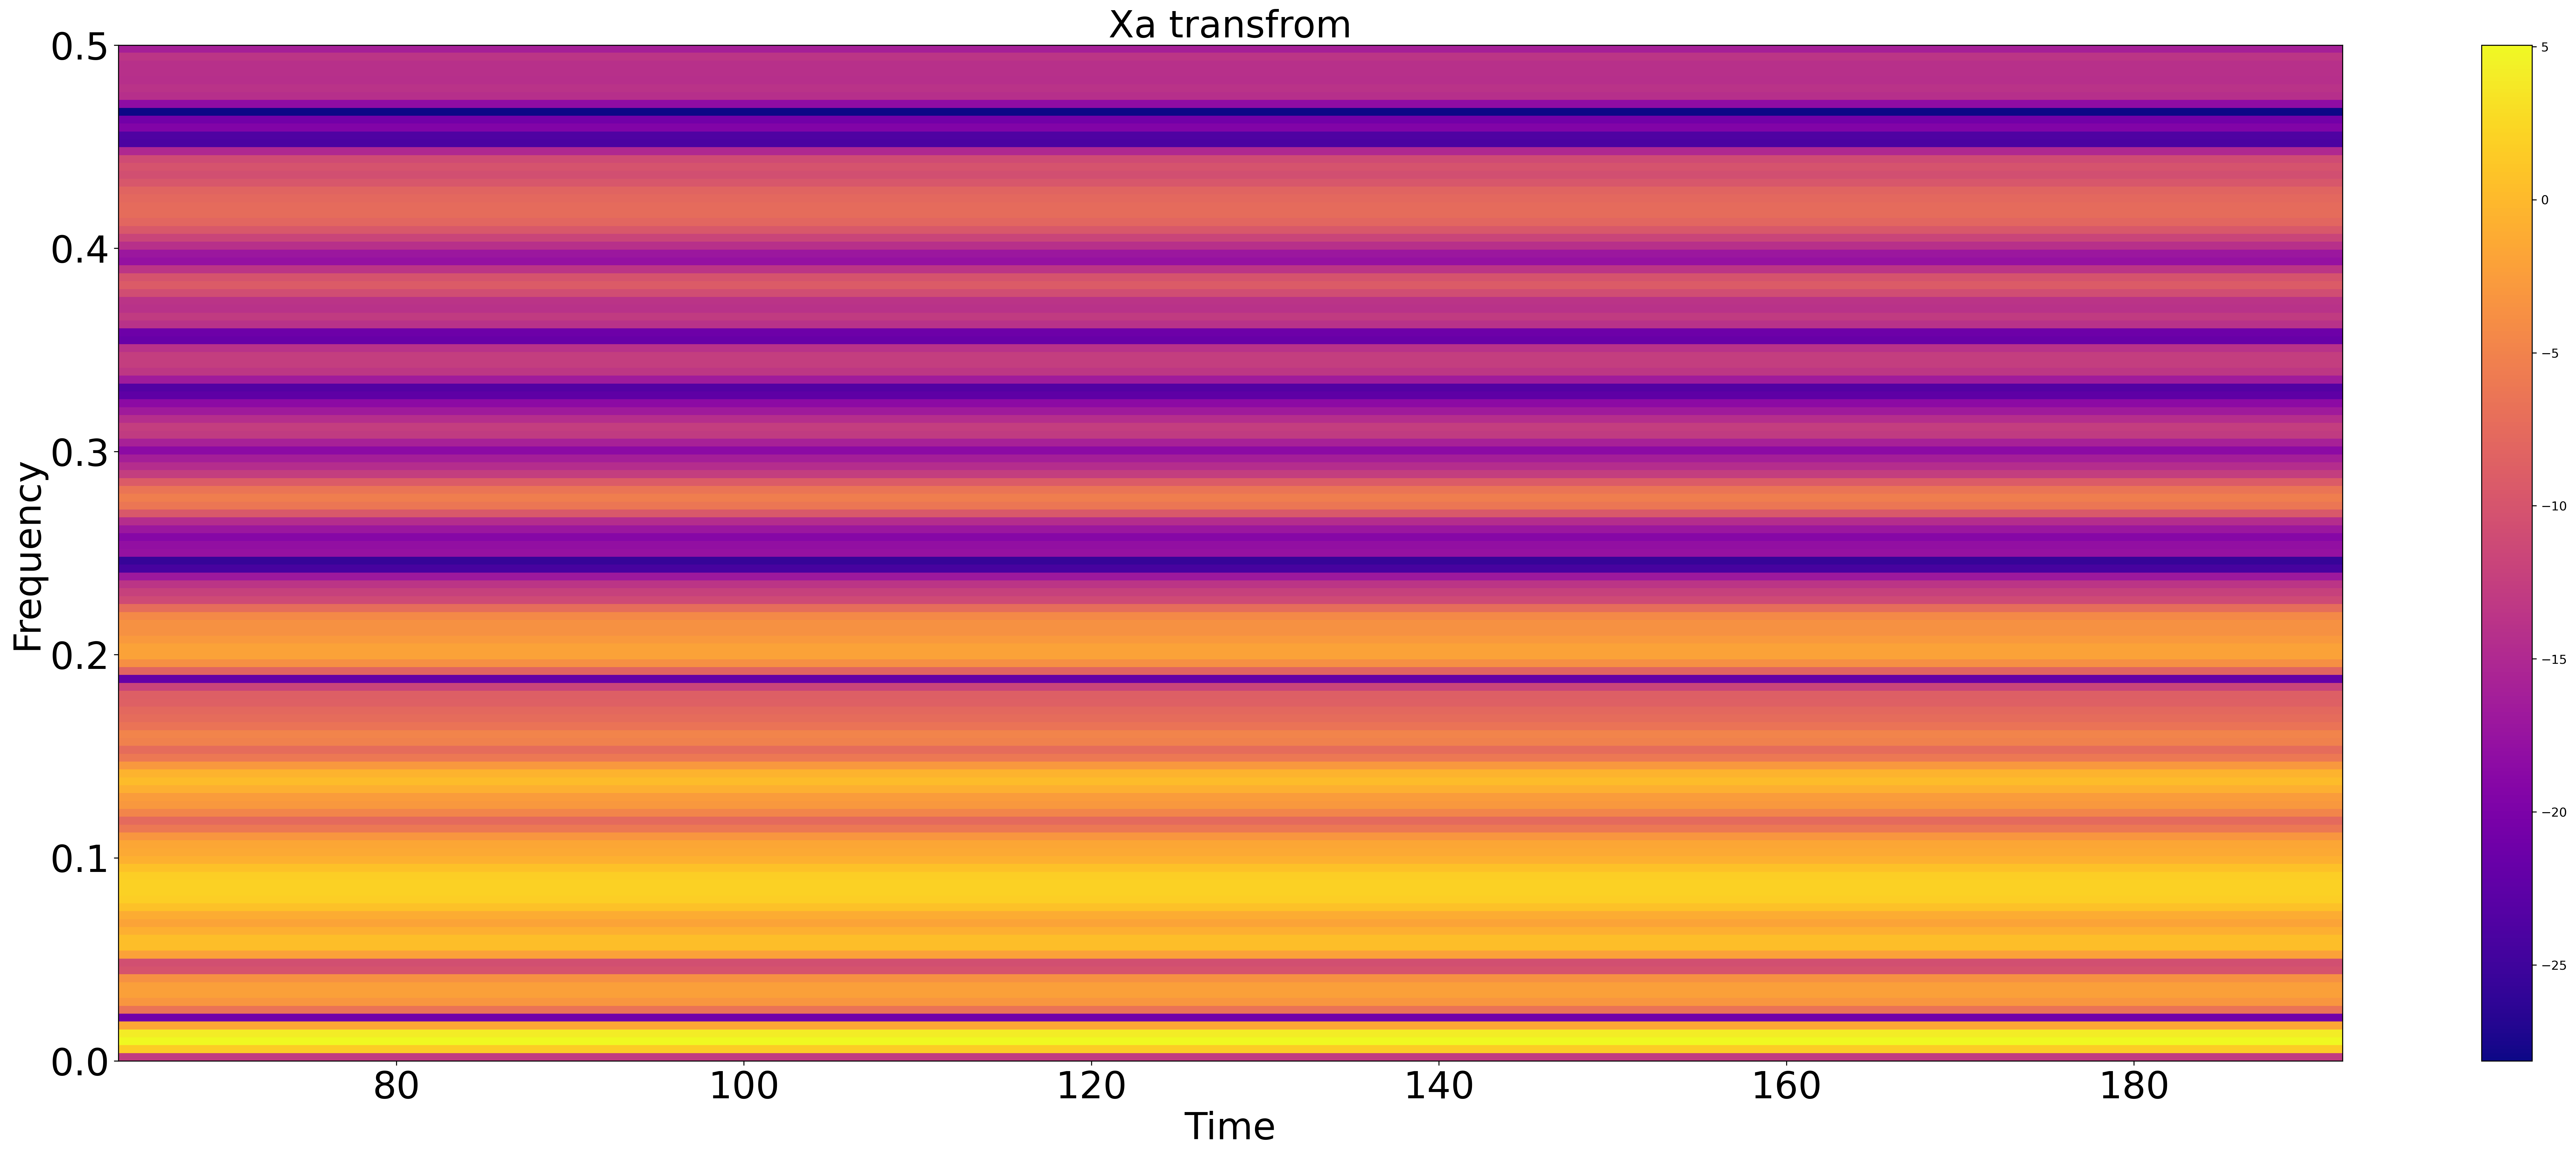

<ipython-input-50-462cf41a0458>:24: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=126).
  plt.specgram(data[:,2])


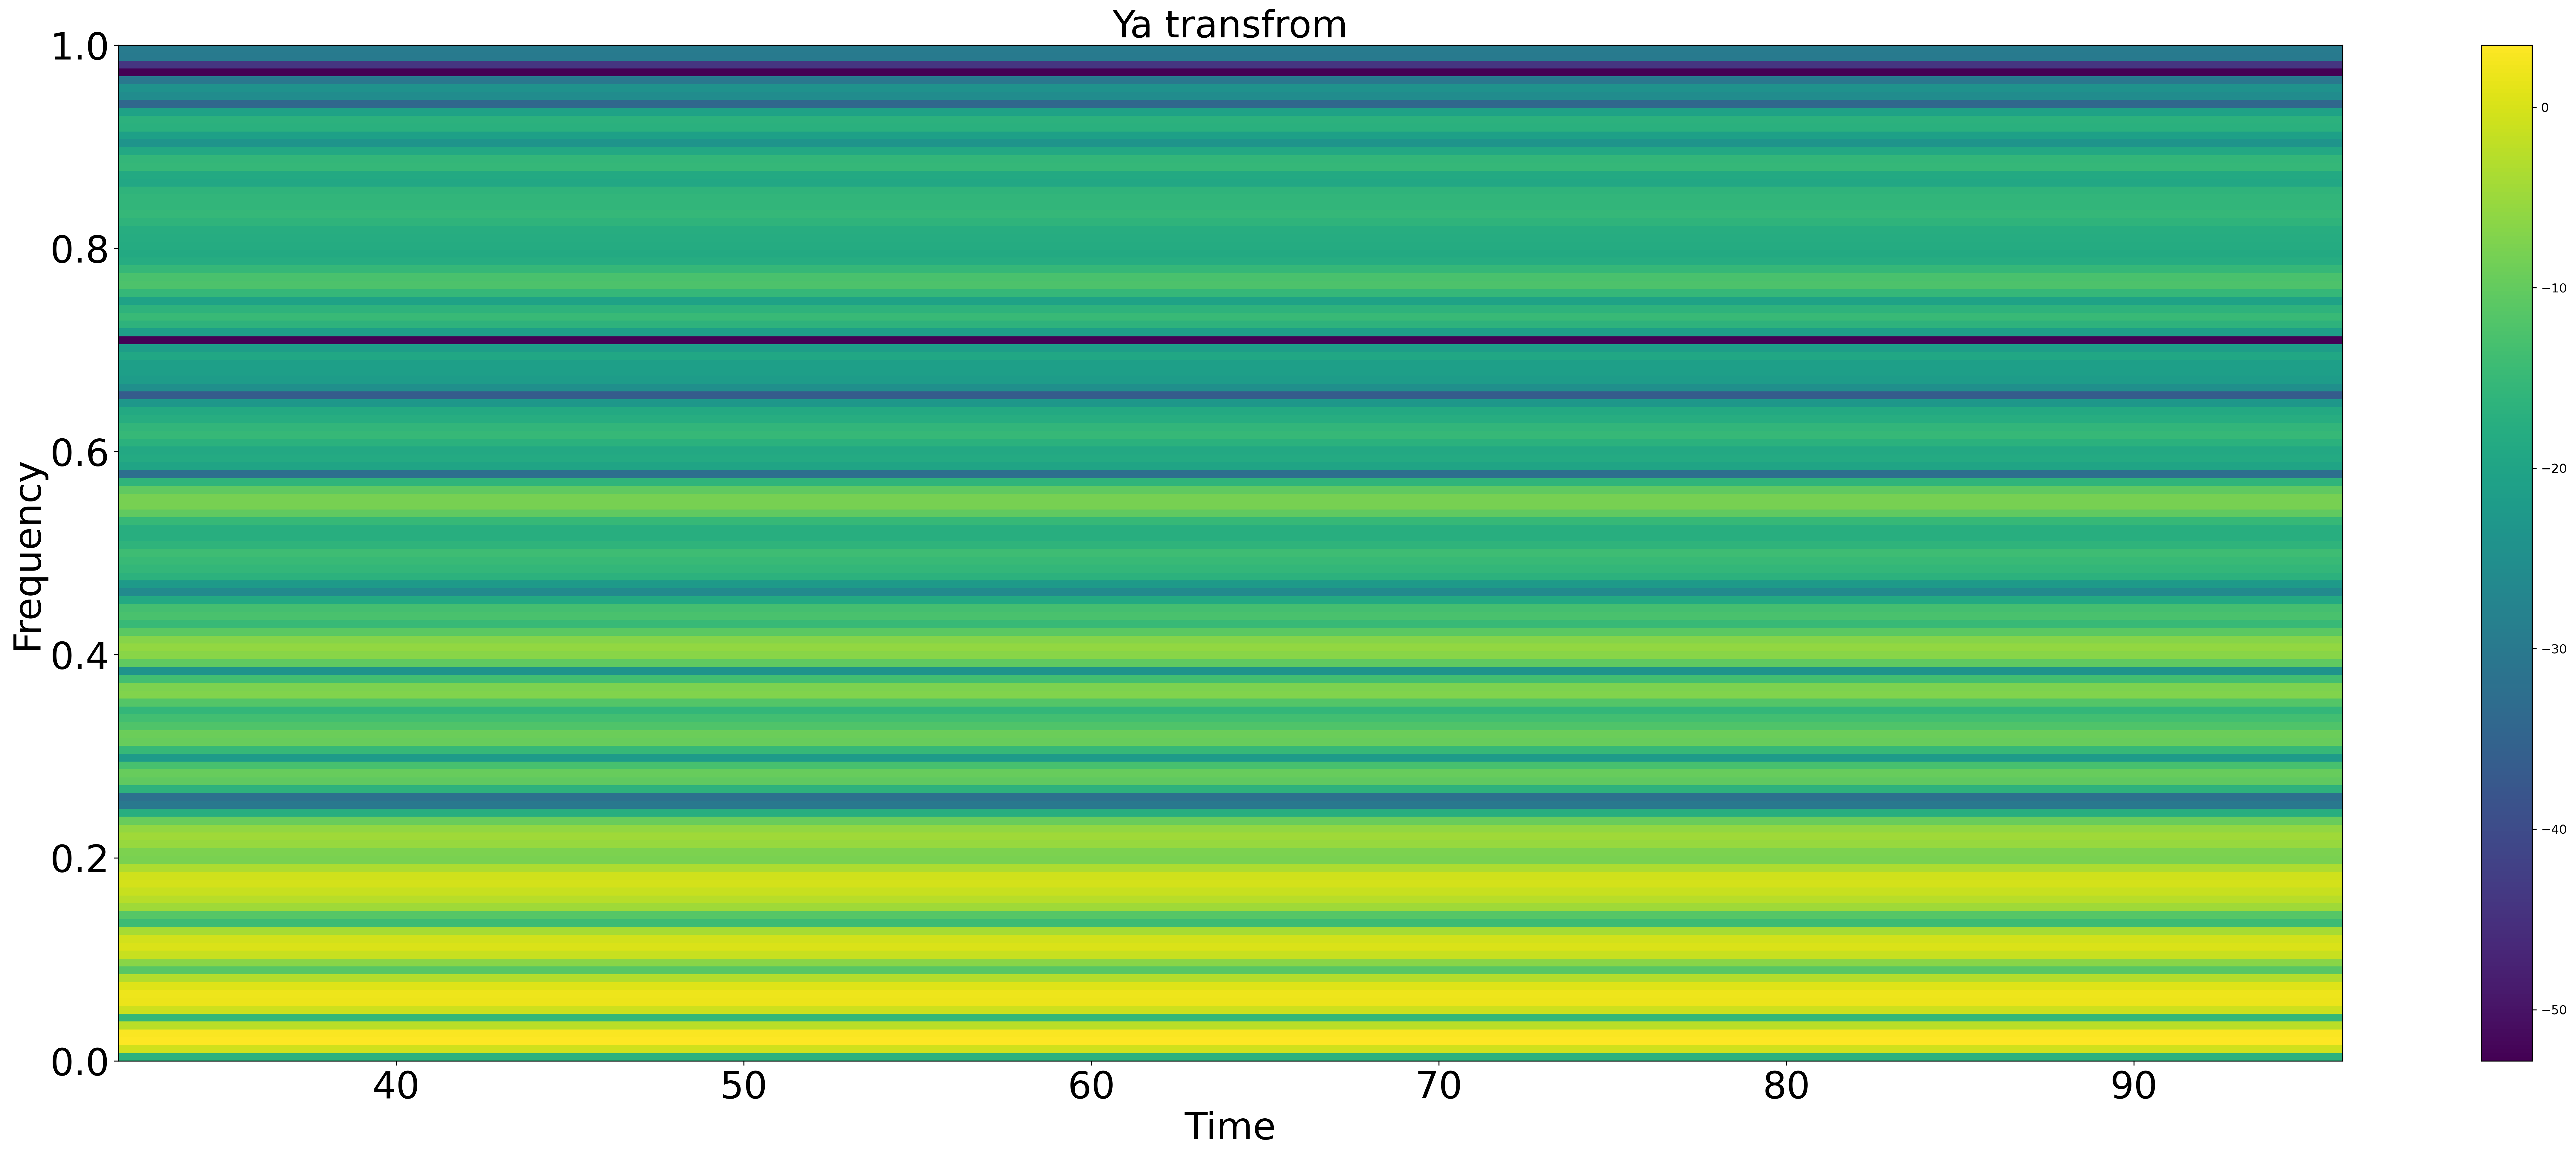

<ipython-input-50-462cf41a0458>:34: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=126).
  plt.specgram(data[:,3])


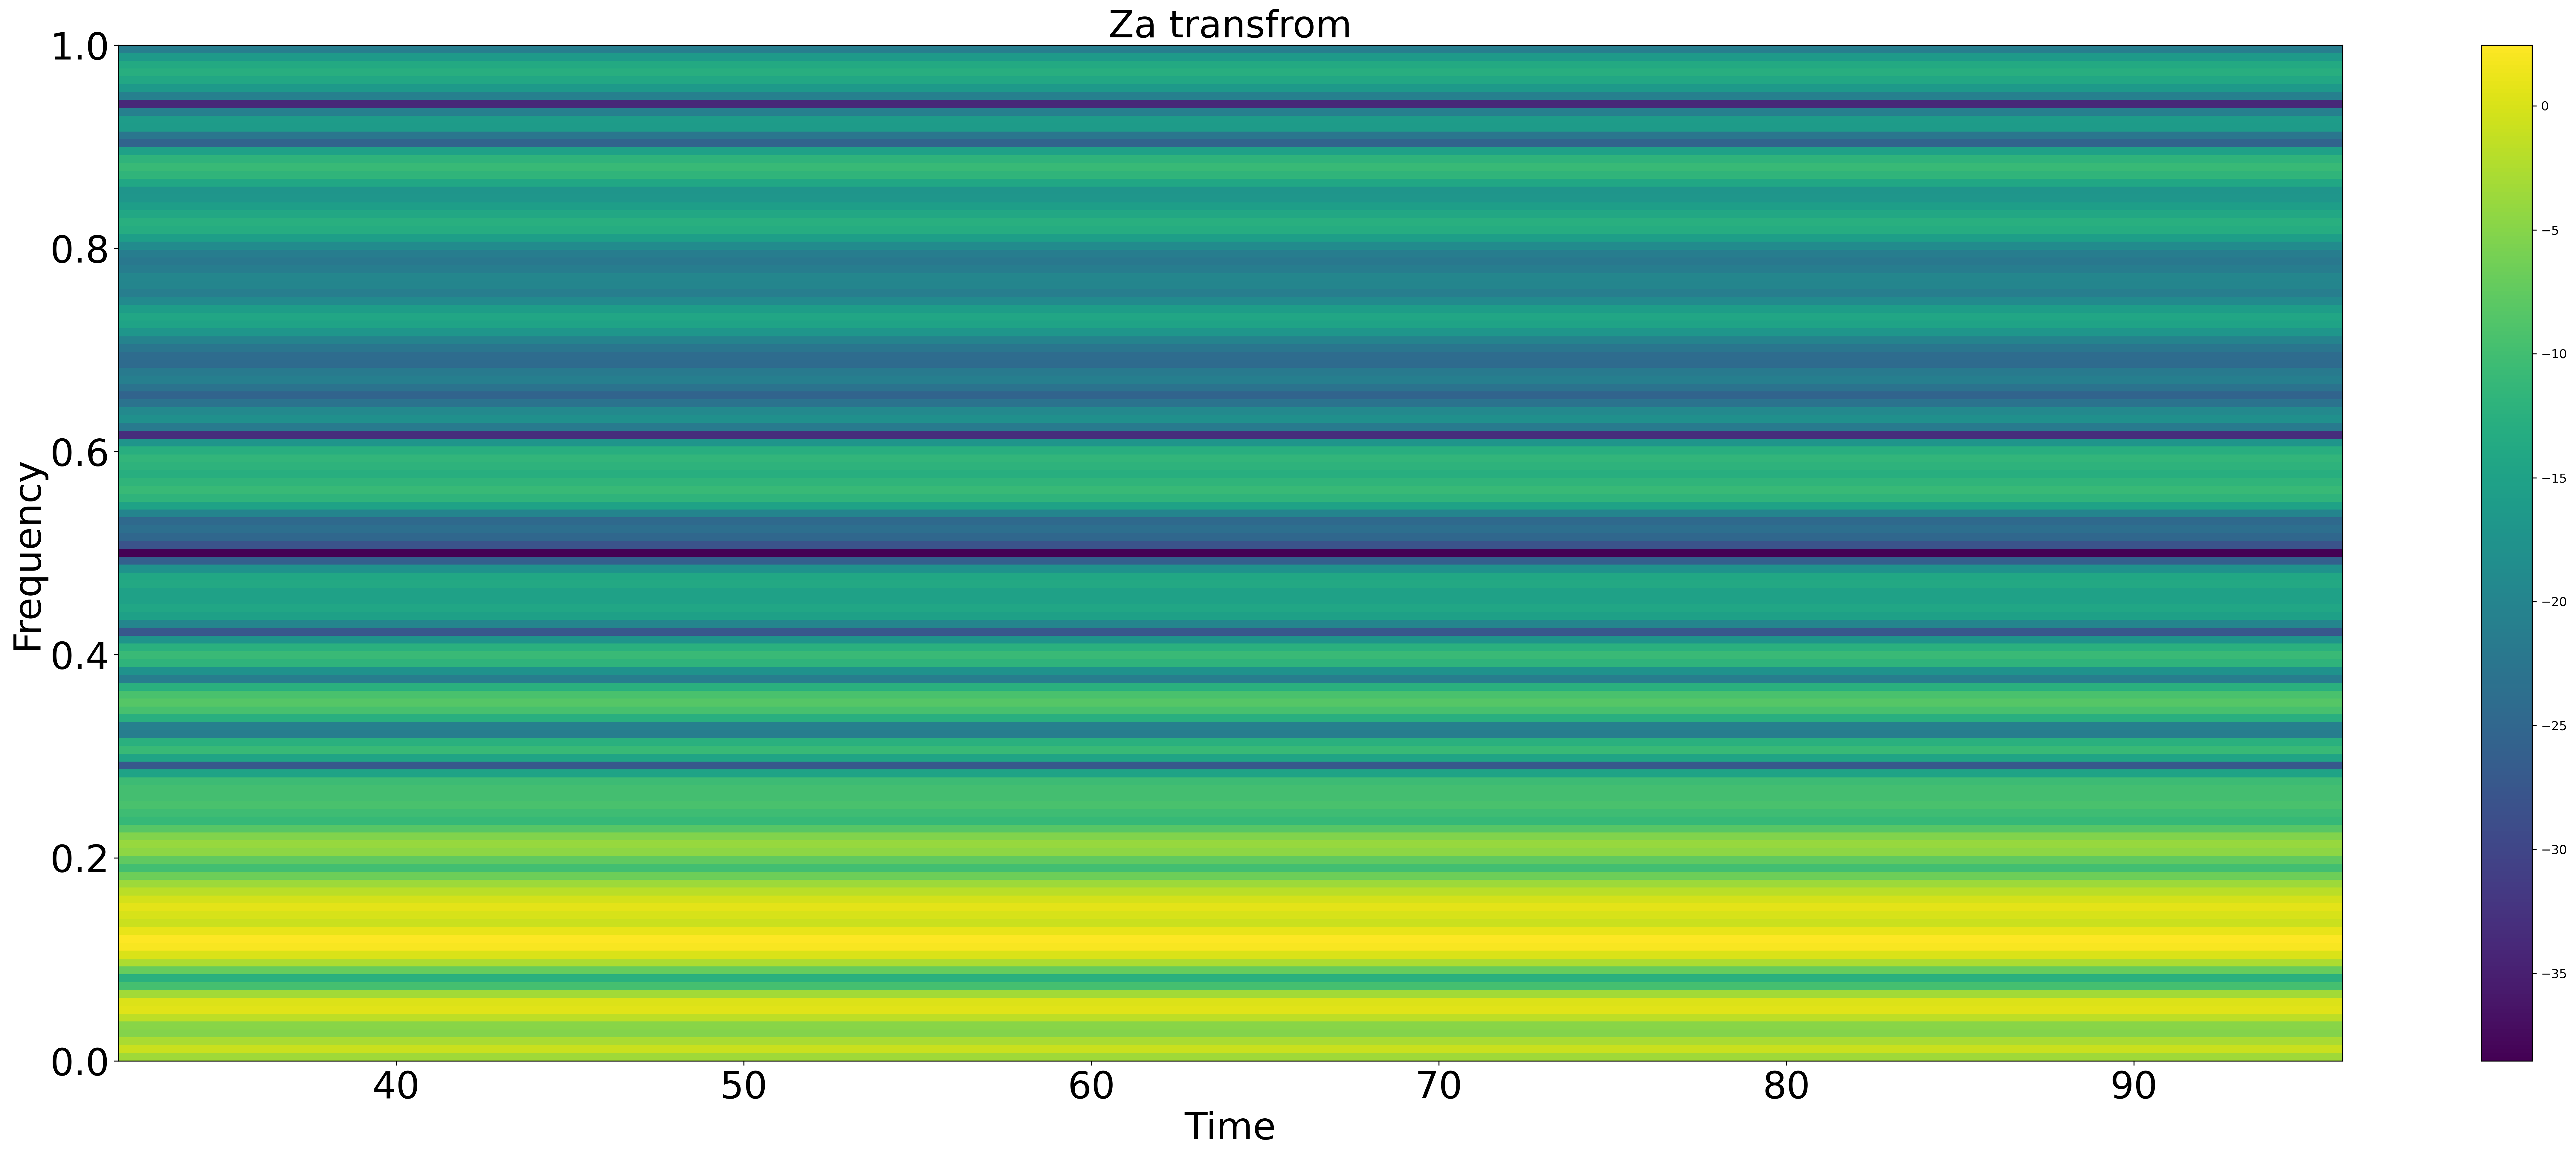

In [50]:
# plot_color_gradients('Sequential',
#                      ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#                       'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#                       'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])
# plot_color_gradients('Perceptually Uniform Sequential',
#                      ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Xa transfrom',fontsize = 30)  
plt.specgram(data[:,1],Fs=1,cmap='plasma')
plt.colorbar()
plt.show()

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Ya transfrom',fontsize = 30)  
plt.specgram(data[:,2])
plt.colorbar()
plt.show()

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Za transfrom',fontsize = 30)  
plt.specgram(data[:,3])
plt.colorbar()
plt.show()